In [1]:
from sdv import load_demo

In [2]:
metadata, tables = load_demo(metadata=True)

In [3]:
metadata.to_dict()

{'tables': {'users': {'primary_key': 'user_id',
   'fields': {'user_id': {'type': 'id', 'subtype': 'integer'},
    'country': {'type': 'categorical'},
    'gender': {'type': 'categorical'},
    'age': {'type': 'numerical', 'subtype': 'integer'}}},
  'sessions': {'primary_key': 'session_id',
   'fields': {'session_id': {'type': 'id', 'subtype': 'integer'},
    'user_id': {'ref': {'field': 'user_id', 'table': 'users'},
     'type': 'id',
     'subtype': 'integer'},
    'device': {'type': 'categorical'},
    'os': {'type': 'categorical'}}},
  'transactions': {'primary_key': 'transaction_id',
   'fields': {'transaction_id': {'type': 'id', 'subtype': 'integer'},
    'session_id': {'ref': {'field': 'session_id', 'table': 'sessions'},
     'type': 'id',
     'subtype': 'integer'},
    'timestamp': {'type': 'datetime', 'format': '%Y-%m-%d'},
    'amount': {'type': 'numerical', 'subtype': 'float'},
    'approved': {'type': 'boolean'}}}}}

In [4]:
tables

{'users':    user_id country gender  age
 0        0     USA      M   34
 1        1      UK      F   23
 2        2      ES   None   44
 3        3      UK      M   22
 4        4     USA      F   54
 5        5      DE      M   57
 6        6      BG      F   45
 7        7      ES   None   41
 8        8      FR      F   23
 9        9      UK   None   30,
 'sessions':    session_id  user_id  device       os
 0           0        0  mobile  android
 1           1        1  tablet      ios
 2           2        1  tablet  android
 3           3        2  mobile  android
 4           4        4  mobile      ios
 5           5        5  mobile  android
 6           6        6  mobile      ios
 7           7        6  tablet      ios
 8           8        6  mobile      ios
 9           9        8  tablet      ios,
 'transactions':    transaction_id  session_id           timestamp  amount  approved
 0               0           0 2019-01-01 12:34:32   100.0      True
 1               1  

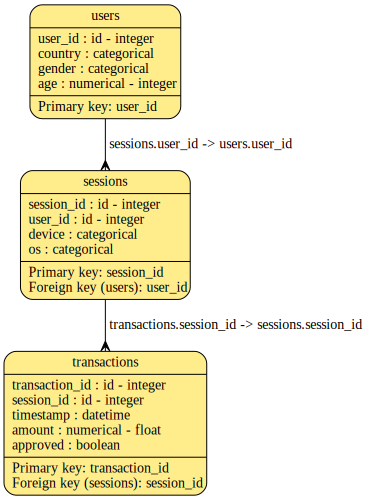

In [5]:
metadata.visualize()

In [6]:
from sdv import SDV

sdv = SDV()
sdv.fit(metadata, tables)

2020-07-02 14:24:31,338 - INFO - modeler - Modeling users
2020-07-02 14:24:31,339 - INFO - metadata - Loading transformer CategoricalTransformer for field country
2020-07-02 14:24:31,340 - INFO - metadata - Loading transformer CategoricalTransformer for field gender
2020-07-02 14:24:31,341 - INFO - metadata - Loading transformer NumericalTransformer for field age
2020-07-02 14:24:31,356 - INFO - modeler - Modeling sessions
2020-07-02 14:24:31,357 - INFO - metadata - Loading transformer CategoricalTransformer for field device
2020-07-02 14:24:31,357 - INFO - metadata - Loading transformer CategoricalTransformer for field os
2020-07-02 14:24:31,371 - INFO - modeler - Modeling transactions
2020-07-02 14:24:31,372 - INFO - metadata - Loading transformer DatetimeTransformer for field timestamp
2020-07-02 14:24:31,373 - INFO - metadata - Loading transformer NumericalTransformer for field amount
2020-07-02 14:24:31,373 - INFO - metadata - Loading transformer BooleanTransformer for field appro

In [7]:
sdv.sample_all(10)

{'users':    user_id country gender  age
 0        0      ES      F   50
 1        1      FR    NaN   61
 2        2      UK      F   19
 3        3     USA      F   37
 4        4      UK      M   14
 5        5     USA      M   20
 6        6      FR      F   41
 7        7      UK    NaN   15
 8        8     USA      F   17
 9        9      UK      M   27,
 'sessions':    session_id  user_id  device       os
 0           0        5  mobile  android
 1           1        3  tablet      ios
 2           2        5  mobile      ios
 3           3        2  mobile      ios
 4           4        1  mobile      ios
 5           5        8  mobile      ios
 6           6        3  mobile      ios
 7           7        2  tablet      ios
 8           8        8  tablet      ios,
 'transactions':     transaction_id  session_id                     timestamp       amount  \
 0                0           1 2019-01-05 19:44:17.109082880   108.520480   
 1                1           0 2019-01-05 